Given model parameter $\theta$ of a chemical reaction network, one can couple 2 tau-leaping simulation with $\tau, \tau' = 2\tau$. The 2 processes are denoted as $Z,Z'$. And then one step tau-leaping can be seen as 

$$
Z(\tau) = Z(0) + \sum_k [
    Y_{k,1}(\min(\lambda_0,\lambda'_0)) + 
    Y_{k,2}(\lambda_0 - \min(\lambda_0, \lambda'_0) )] \nu_k
$$

$$
Z(2\tau) = Z(\tau) + \sum_k [
    Y_{k,3}(\min(\lambda_\tau,\lambda'_0)) + 
    Y_{k,4}(\lambda_\tau - \min(\lambda_\tau, \lambda'_0) )] \nu_k
$$

$$ 
Z'(2\tau) = Z_{\tau}'(0) + \sum_k [Y_{k,1}(\min(\lambda_0,\lambda'_0)) + Y_{k,5}(\lambda_0' - \min(\lambda_0, \lambda'_0) ) + Y_{k,3}(\min(\lambda_\tau,\lambda'_0)) + Y_{k,6}(\lambda'_0 - \min(\lambda_\tau,\lambda'_0)) ]\nu_k
$$

where $Y_{k,i}, i = 1,2,3,4,5,6$ are independent poisson processes. $\lambda$ are propensity function times $\tau$



for each step of $\tau$ we need to sample and compute the propensity. and they need to be computed in a specific order
1. $\lambda_0,\lambda_0'$
2. $Y_{1}, Y_{2}, Y_{5}$
3. $Z(\tau)$
4. $\lambda_\tau$
5. $Y_{3}, Y_4$
6. $Y_6$
7. $Z'(2\tau)$

this is very tricky to code... And notice that this formula extends to the case of $\tau' = n \tau$ quite easily. 

In [1]:
import numpy as np
import sys
sys.path.insert(1,'./src/')
from models import Repressilator
from matplotlib import pyplot as plt

In [2]:
alpha0 = 1
alpha = 1000
n = 2
K = 20
beta = 5
gamma = 1

model_parameter = np.array([alpha0,alpha,n,K,beta,gamma])

X_init = np.array([0,0,0,40,20,60])

model = Repressilator(model_parameter)

# 3-level coupling 

In [32]:
Xs3,Ts3 = model.tau_leaping_coupled(X_init,1e-3,n=2,levels=3,T=10)

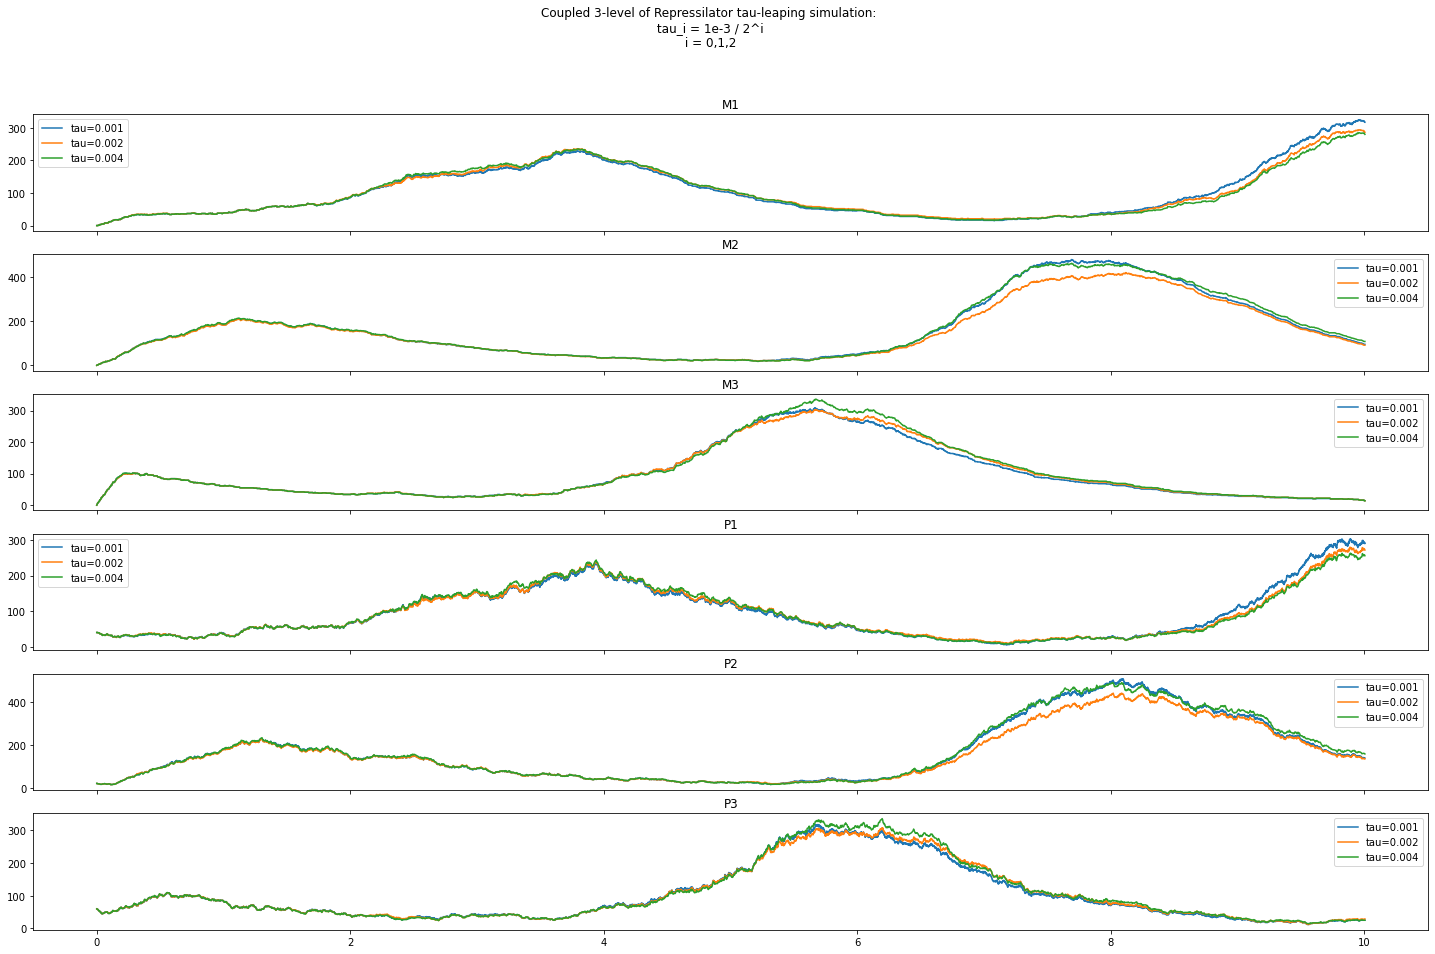

In [33]:
fig, axes = plt.subplots(6,1,figsize=(25,15),sharex=True)
fig.suptitle('Coupled 3-level of Repressilator tau-leaping simulation:\n tau_i = 1e-3 / 2^i\n i = 0,1,2')

for i in range(6):
    for j in range(3):
        label = 'tau=' + str(Ts3[j][1] - Ts3[j][0])
        axes[i].plot(Ts3[j],Xs3[j][:,i],label=label)
        axes[i].set_title(model.index2chemical[i])
        axes[i].legend()


# 2-level Coupling

In [30]:
Xs2,Ts2 = model.tau_leaping_coupled(X_init,1e-3,n=2,levels=3,T=10)

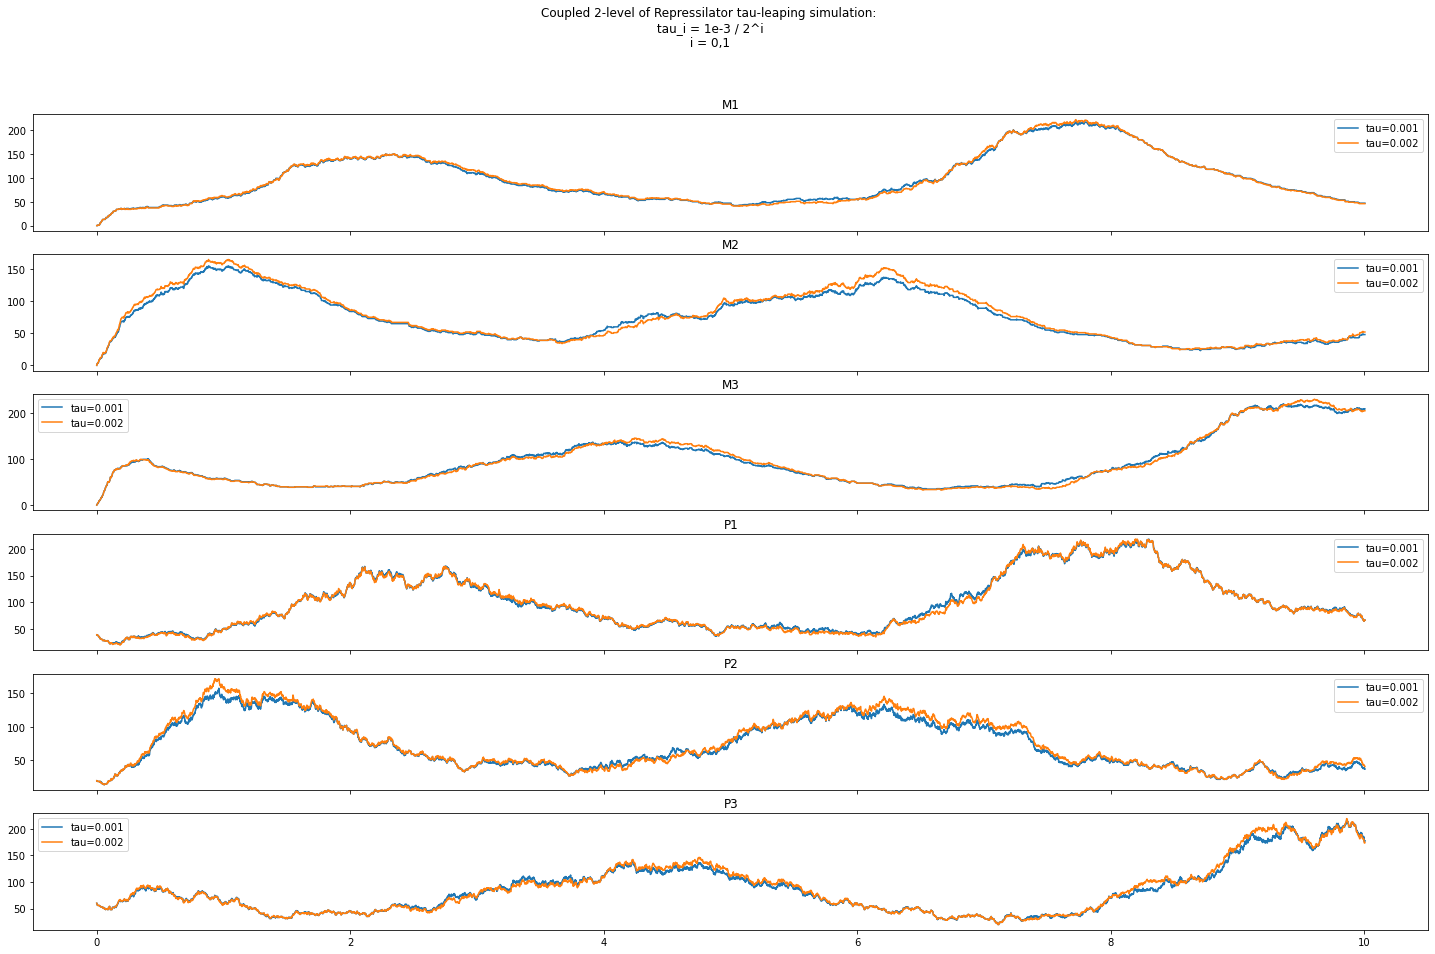

In [31]:
fig, axes = plt.subplots(6,1,figsize=(25,15),sharex=True)
fig.suptitle('Coupled 2-level of Repressilator tau-leaping simulation:\n tau_i = 1e-3 / 2^i\n i = 0,1')

for i in range(6):
    for j in range(2):
        label = 'tau=' + str(Ts2[j][1] - Ts2[j][0])
        axes[i].plot(Ts2[j],Xs2[j][:,i],label=label)
        axes[i].set_title(model.index2chemical[i])
        axes[i].legend()
